In [3]:
import numpy as np
import pandas as pd
from statsmodels.tsa.filters.hp_filter import hpfilter

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

### Detecting trends: Hodrick-Prescott filter (hp_filter)

The Hodrick-Prescott (HP) filter has become a benchmark for getting rid of trend movements in data. This method is broadly employed for econometric methods in applied macroeconomics research. The technique is nonparametric and is used to dissolve a time series into a trend; it is a cyclical component unaided by economic theory or prior trend specification.

This function takes two parameters into account:
- 1D array
- lambda (1600 for quarterly, 6.25 for annual, 129600 for monthly)


In [5]:
df = pd.read_excel('data/edge_techniques/India_Exchange_Rate_Dataset.xls', index_col=0, parse_dates=True)
df

,EXINUS
observation_date,
1973-01-01,8.0041
1973-02-01,7.7538
1973-03-01,7.5465
1973-04-01,7.5462
1973-05-01,7.4927
...,...
2019-07-01,68.7391
2019-08-01,71.1891
2019-09-01,71.3110


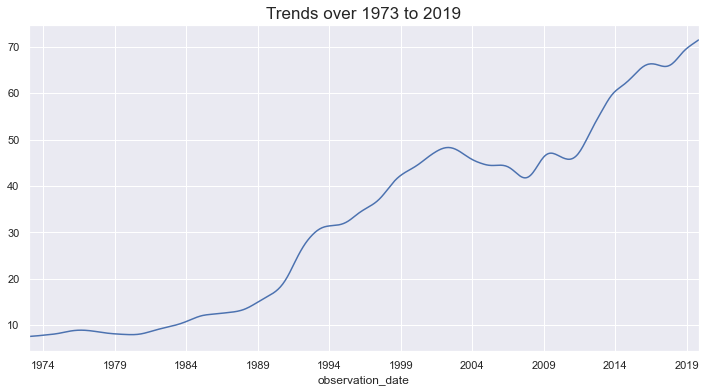

In [14]:
cycle, trend = hpfilter(df.EXINUS, lamb=1600)

title = f'Trends over {df.index.min().year} to {df.index.max().year}'
trend.plot(figsize=(12, 6)).autoscale(axis='x', tight=True)
plt.title(title, fontsize=17)
plt.show()